# Venture Funding with Deep Learning

You work as a risk management associate at Alphabet Soup, a venture capital firm. Alphabet Soup’s business team receives many funding applications from startups every day. This team has asked you to help them create a model that predicts whether applicants will be successful if funded by Alphabet Soup.

The business team has given you a CSV containing more than 34,000 organizations that have received funding from Alphabet Soup over the years. With your knowledge of machine learning and neural networks, you decide to use the features in the provided dataset to create a binary classifier model that will predict whether an applicant will become a successful business. The CSV file contains a variety of information about these businesses, including whether or not they ultimately became successful.

## Instructions:

The steps for this challenge are broken out into the following sections:

* Prepare the data for use on a neural network model.

* Compile and evaluate a binary classification model using a neural network.

* Optimize the neural network model.

### Prepare the Data for Use on a Neural Network Model 

Using your knowledge of Pandas and scikit-learn’s `StandardScaler()`, preprocess the dataset so that you can use it to compile and evaluate the neural network model later.

Open the starter code file, and complete the following data preparation steps:

1. Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.   

2. Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.
 
3. Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

4. Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

5. Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 

6. Split the features and target sets into training and testing datasets.

7. Use scikit-learn's `StandardScaler` to scale the features data.

### Compile and Evaluate a Binary Classification Model Using a Neural Network

Use your knowledge of TensorFlow to design a binary classification deep neural network model. This model should use the dataset’s features to predict whether an Alphabet Soup&ndash;funded startup will be successful based on the features in the dataset. Consider the number of inputs before determining the number of layers that your model will contain or the number of neurons on each layer. Then, compile and fit your model. Finally, evaluate your binary classification model to calculate the model’s loss and accuracy. 
 
To do so, complete the following steps:

1. Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.

2. Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.

> **Hint** When fitting the model, start with a small number of epochs, such as 20, 50, or 100.

3. Evaluate the model using the test data to determine the model’s loss and accuracy.

4. Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 

### Optimize the Neural Network Model

Using your knowledge of TensorFlow and Keras, optimize your model to improve the model's accuracy. Even if you do not successfully achieve a better accuracy, you'll need to demonstrate at least two attempts to optimize the model. You can include these attempts in your existing notebook. Or, you can make copies of the starter notebook in the same folder, rename them, and code each model optimization in a new notebook. 

> **Note** You will not lose points if your model does not achieve a high accuracy, as long as you make at least two attempts to optimize the model.

To do so, complete the following steps:

1. Define at least three new deep neural network models (the original plus 2 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.

2. After finishing your models, display the accuracy scores achieved by each model, and compare the results.

3. Save each of your models as an HDF5 file.


In [43]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.  


In [44]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
applicant_data_df = pd.read_csv("../Starter_Code/Resources/applicants_data.csv")

# Review the DataFrame
applicant_data_df.head()


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [45]:
# Review the data types associated with the columns
applicant_data_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

### Step 2: Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.

In [46]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df = applicant_data_df.drop(columns=['EIN', 'NAME'])

# Review the DataFrame
applicant_data_df.head()


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


### Step 3: Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

In [47]:
# Create a list of categorical variables 
categorical_variables = ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS']

# Display the categorical variables list
print(categorical_variables)


['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS']


In [48]:
# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')


In [49]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = encoder.fit_transform(applicant_data_df[categorical_variables])


C:\Users\miyak\anaconda3\envs\dev\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [50]:
# Create a DataFrame with the encoded variables
feature_names = []
for i, var in enumerate(categorical_variables):
    feature_names += [f"{var}_{j}" for j in encoder.categories_[i]]
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)


# Review the DataFrame
print(encoded_df)


       APPLICATION_TYPE_T10  APPLICATION_TYPE_T12  APPLICATION_TYPE_T13  \
0                       1.0                   0.0                   0.0   
1                       0.0                   0.0                   0.0   
2                       0.0                   0.0                   0.0   
3                       0.0                   0.0                   0.0   
4                       0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
34294                   0.0                   0.0                   0.0   
34295                   0.0                   0.0                   0.0   
34296                   0.0                   0.0                   0.0   
34297                   0.0                   0.0                   0.0   
34298                   0.0                   0.0                   0.0   

       APPLICATION_TYPE_T14  APPLICATION_TYPE_T15  APPLICATION_TYPE_T17  \
0                       

### Step 4: Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

In [51]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
numerical_variable = ['ASK_AMT', 'IS_SUCCESSFUL']
combined_df = pd.concat([applicant_data_df[numerical_variable], encoded_df], axis=1)

# Review the Dataframe
print(combined_df)


        ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_T10  APPLICATION_TYPE_T12  \
0          5000              1                   1.0                   0.0   
1        108590              1                   0.0                   0.0   
2          5000              0                   0.0                   0.0   
3          6692              1                   0.0                   0.0   
4        142590              1                   0.0                   0.0   
...         ...            ...                   ...                   ...   
34294      5000              0                   0.0                   0.0   
34295      5000              0                   0.0                   0.0   
34296      5000              0                   0.0                   0.0   
34297      5000              1                   0.0                   0.0   
34298  36500179              0                   0.0                   0.0   

       APPLICATION_TYPE_T13  APPLICATION_TYPE_T14  APPLICATION_

### Step 5: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 



In [52]:
# Define the target set y using the IS_SUCCESSFUL column
y = combined_df["IS_SUCCESSFUL"]

# Display a sample of y
print(y)


0        1
1        1
2        0
3        1
4        1
        ..
34294    0
34295    0
34296    0
34297    1
34298    0
Name: IS_SUCCESSFUL, Length: 34299, dtype: int64


In [53]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = combined_df.drop("IS_SUCCESSFUL", axis=1)

# Review the features DataFrame
print(X)


        ASK_AMT  APPLICATION_TYPE_T10  APPLICATION_TYPE_T12  \
0          5000                   1.0                   0.0   
1        108590                   0.0                   0.0   
2          5000                   0.0                   0.0   
3          6692                   0.0                   0.0   
4        142590                   0.0                   0.0   
...         ...                   ...                   ...   
34294      5000                   0.0                   0.0   
34295      5000                   0.0                   0.0   
34296      5000                   0.0                   0.0   
34297      5000                   0.0                   0.0   
34298  36500179                   0.0                   0.0   

       APPLICATION_TYPE_T13  APPLICATION_TYPE_T14  APPLICATION_TYPE_T15  \
0                       0.0                   0.0                   0.0   
1                       0.0                   0.0                   0.0   
2                 

### Step 6: Split the features and target sets into training and testing datasets.


In [54]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


### Step 7: Use scikit-learn's `StandardScaler` to scale the features data.

In [55]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


---

## Compile and Evaluate a Binary Classification Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [56]:
# Define the the number of inputs (features) to the model
number_input_features = 8

# Review the number of features
number_input_features = X_train_scaled.shape[1]


In [57]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [58]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = 20

# Review the number hidden nodes in the first layer
hidden_nodes_layer1 = X_train_scaled.shape[1]
print(hidden_nodes_layer1)

117


In [59]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = 10

# Review the number hidden nodes in the second layer
hidden_nodes_layer2 = X_test_scaled.shape[1]
print(hidden_nodes_layer2)

117


In [60]:
# Create the Sequential model instance
nn = Sequential()


In [61]:
# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, activation='relu'))


In [62]:
# Add the second hidden layer
model = Sequential()
model.add(Dense(units=hidden_nodes_layer2, activation='relu'))


In [63]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=1, activation='sigmoid'))


In [64]:
# Display the Sequential model summary
nn.build(input_shape=(None, number_input_features))
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 117)               13806     
                                                                 
 dense_8 (Dense)             (None, 1)                 118       
                                                                 
Total params: 13,924
Trainable params: 13,924
Non-trainable params: 0
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [65]:
# Compile the Sequential model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
# Fit the model using epochs and the training data
model = nn.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
804/804 [==============================] - 2s 1ms/step - loss: 0.5836 - accuracy: 0.7186
Epoch 2/20
804/804 [==============================] - 1s 1ms/step - loss: 0.5596 - accuracy: 0.7294
Epoch 3/20
804/804 [==============================] - 1s 1ms/step - loss: 0.5560 - accuracy: 0.7283
Epoch 4/20
804/804 [==============================] - 1s 1ms/step - loss: 0.5526 - accuracy: 0.7308
Epoch 5/20
804/804 [==============================] - 1s 1ms/step - loss: 0.5514 - accuracy: 0.7304
Epoch 6/20
804/804 [==============================] - 1s 1ms/step - loss: 0.5511 - accuracy: 0.7305
Epoch 7/20
804/804 [==============================] - 1s 1ms/step - loss: 0.5489 - accuracy: 0.7328
Epoch 8/20
804/804 [==============================] - 1s 1ms/step - loss: 0.5492 - accuracy: 0.7325
Epoch 9/20
804/804 [==============================] - 1s 1ms/step - loss: 0.5478 - accuracy: 0.7324
Epoch 10/20
804/804 [==============================] - 1s 1ms/step - loss: 0.5471 - accuracy: 0.7313

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [67]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5582 - accuracy: 0.7320 - 490ms/epoch - 2ms/step
Loss: 0.5582460761070251, Accuracy: 0.7320116758346558


### Step 4: Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 


In [68]:
# Set the model's file path
file_path = Path("../Starter_Code/Resources")

# Export your model to a HDF5 file
nn.save(file_path)

INFO:tensorflow:Assets written to: ..\Starter_Code\Resources\assets


INFO:tensorflow:Assets written to: ..\Starter_Code\Resources\assets


---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


### Alternative Model 1

In [69]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

117

In [70]:
# Define the number of neurons in the output layer
number_output_neurons_A1 = 1

In [71]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A1 = 50

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A1 = X_test_scaled.shape[1]
print(hidden_nodes_layer1_A1)

117


In [72]:
# Create the Sequential model instance
nn_A1 = Sequential()

In [73]:
# First hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer1_A1, activation='relu', input_dim=number_input_features))


# Output layer
nn_A1.add(Dense(units=1, activation='sigmoid'))


# Check the structure of the model
nn_A1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 117)               13806     
                                                                 
 dense_10 (Dense)            (None, 1)                 118       
                                                                 
Total params: 13,924
Trainable params: 13,924
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Compile the Sequential model
nn_A1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
# Fit the model using 50 epochs and the training data
fit_model_A1 = nn_A1.fit(X_train_scaled, y_train, epochs=50)


Epoch 1/50
804/804 [==============================] - 2s 1ms/step - loss: 0.5808 - accuracy: 0.7184
Epoch 2/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5584 - accuracy: 0.7292
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5558 - accuracy: 0.7280
Epoch 4/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5519 - accuracy: 0.7297
Epoch 5/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5503 - accuracy: 0.7301
Epoch 6/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5493 - accuracy: 0.7313
Epoch 7/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5481 - accuracy: 0.7320
Epoch 8/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5470 - accuracy: 0.7324
Epoch 9/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5472 - accuracy: 0.7322
Epoch 10/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5465 - accuracy: 0.7315

#### Alternative Model 2

In [76]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

117

In [77]:
# Define the number of neurons in the output layer
number_output_neurons_A2 = 1

In [78]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A2 = 100

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A2 = X_test_scaled.shape[1]
print(hidden_nodes_layer1_A2)

117


In [79]:
# Create the Sequential model instance
nn_A2 = Sequential()

In [80]:
# First hidden layer
nn_A2.add(Dense(units=hidden_nodes_layer1_A2, activation='relu', input_dim=number_input_features))

# Output layer
nn_A2.add(Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_A2.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 117)               13806     
                                                                 
 dense_12 (Dense)            (None, 1)                 118       
                                                                 
Total params: 13,924
Trainable params: 13,924
Non-trainable params: 0
_________________________________________________________________


In [81]:
# Compile the model
nn_A2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [82]:
# Fit the model
fit_model_A2 = nn_A2.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5810 - accuracy: 0.7212
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5577 - accuracy: 0.7291
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5547 - accuracy: 0.7289
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5529 - accuracy: 0.7302
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5501 - accuracy: 0.7308
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5501 - accuracy: 0.7318
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5486 - accuracy: 0.7324
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5485 - accuracy: 0.7319
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5471 - accuracy: 0.7340
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5478 - accura

### Step 2: After finishing your models, display the accuracy scores achieved by each model, and compare the results.

In [83]:
print("Original Model Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Original Model Results
268/268 - 0s - loss: 0.5582 - accuracy: 0.7320 - 314ms/epoch - 1ms/step
Loss: 0.5582460761070251, Accuracy: 0.7320116758346558


In [84]:
print("Alternative Model 1 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A1.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 1 Results
268/268 - 0s - loss: 0.5861 - accuracy: 0.7314 - 362ms/epoch - 1ms/step
Loss: 0.5860627293586731, Accuracy: 0.7314285635948181


In [85]:
print("Alternative Model 2 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A2.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 2 Results
268/268 - 0s - loss: 0.7192 - accuracy: 0.7324 - 322ms/epoch - 1ms/step
Loss: 0.7192189693450928, Accuracy: 0.7323614954948425


### Step 3: Save each of your alternative models as an HDF5 file.


In [86]:
# Set the file path for the first alternative model
file_path = Path("../Starter_Code/Resources")

# Export your model to a HDF5 file
nn_A1.save(file_path)

INFO:tensorflow:Assets written to: ..\Starter_Code\Resources\assets


INFO:tensorflow:Assets written to: ..\Starter_Code\Resources\assets


In [87]:
# Set the file path for the second alternative model
file_path = Path("../Starter_Code/Resources")

# Export your model to a HDF5 file
nn_A2.save(file_path)


INFO:tensorflow:Assets written to: ..\Starter_Code\Resources\assets


INFO:tensorflow:Assets written to: ..\Starter_Code\Resources\assets


Epoch 1/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5339 - accuracy: 0.7397
Epoch 2/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7402
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5339 - accuracy: 0.7397
Epoch 4/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5340 - accuracy: 0.7398
Epoch 5/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5332 - accuracy: 0.7411
Epoch 6/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5332 - accuracy: 0.7401
Epoch 7/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5330 - accuracy: 0.7402
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5339 - accuracy: 0.7402
Epoch 9/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5332 - accuracy: 0.7395
Epoch 10/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5336 - accuracy: 0.7402

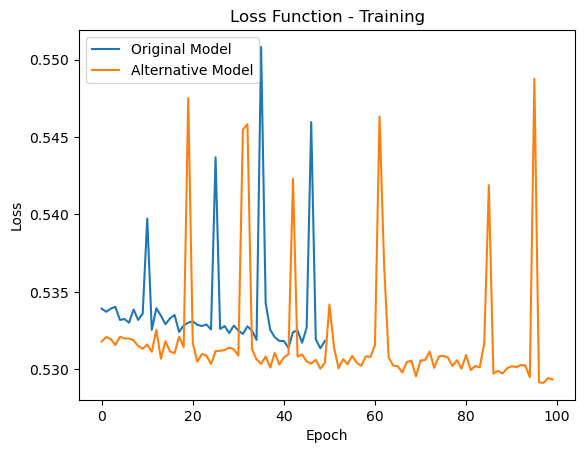

In [93]:
import matplotlib.pyplot as plt

# Train the original model
nn_A1.fit(X_train_scaled, y_train, epochs=50)

# Train the alternative model
nn_A2.fit(X_train_scaled, y_train, epochs=100)

# Plot loss for the original model
plt.plot(nn_A1.history.history["loss"], label="Original Model")

# Plot loss for the alternative model
plt.plot(nn_A2.history.history["loss"], label="Alternative Model")

plt.title("Loss Function - Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
